First, here is a quick way to determine what the intercepts should be, given a desired angle that you want the neurons to be sensitive to.  Here, we want neurons that are sensitive to between +-15 degrees up to +-35 degrees.  

In [30]:
# How to compute intercept range given an angle range

import numpy as np
angle_range_degrees = np.array([15.0, 35.0])
angle_range = angle_range_degrees * np.pi / 180

print np.cos(angle_range)

[ 0.96592583  0.81915204]


So, in order to have tuning curves lke that, we want to have neurons with ```intercepts=nengo.dists.Uniform(0.82, 0.97)``` which is close enough to what It looks like you used in the paper.

In [31]:
import nengo
model = nengo.Network()
with model:
    ens = nengo.Ensemble(n_neurons=400, dimensions=2,
                         intercepts=nengo.dists.Uniform(0.81, 0.97),
                         )
    
sim = nengo.Simulator(model)


Now we compute the tuning curves.  Instead of getting tuning curves for every possible value, we just evaluate it along the unit circle.

In [33]:
import numpy as np
theta_degrees = np.linspace(-100, 100, 201)  # in degrees
theta = theta_degrees * np.pi / 180

x = np.vstack([np.sin(theta), np.cos(theta)]).T

response_curves = np.zeros((ens.n_neurons, len(theta)))

inputs, activity = nengo.utils.ensemble.tuning_curves(ens, sim, inputs=x)
    
    

Plot the results, showing the first 20 neurons only

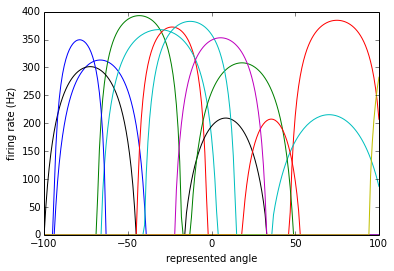

In [34]:
%matplotlib inline
import pylab

pylab.plot(theta_degrees, activity[:,:20])
pylab.xlabel('represented angle')
pylab.ylabel('firing rate (Hz)')
pylab.show()